In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
from pandas import to_datetime
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:

dataset=pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv")

In [3]:
dataset.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [4]:
dataset.tail()

,Month,Sales
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180
107,1968-12,14577


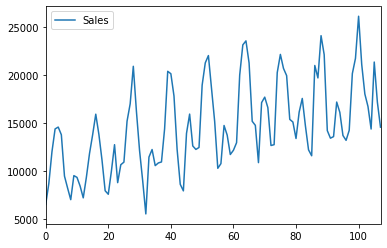

In [5]:
dataset.plot()
plt.show()

In [6]:
dataset.columns=['ds','y']
dataset['ds']=to_datetime(dataset['ds'])
 

In [7]:
dataset.head()
 

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


In [8]:
dataset.isnull().any()

ds    False
y     False
dtype: bool

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
ds    108 non-null datetime64[ns]
y     108 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 KB


In [10]:
dataset.describe()

,y
count,108.000000
mean,14595.111111
std,4525.213913
min,5568.000000
25%,11391.250000
50%,14076.000000
75%,17595.750000
max,26099.000000


In [12]:
model = Prophet()
model.fit(dataset)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\MARKALA MANASWINI\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [13]:
future = list()
for i in range(1,13):
    date = '1969-%02d' % i
    print(date)
    future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])

1969-01
1969-02
1969-03
1969-04
1969-05
1969-06
1969-07
1969-08
1969-09
1969-10
1969-11
1969-12


In [14]:
future

,ds
0,1969-01-01
1,1969-02-01
2,1969-03-01
3,1969-04-01
4,1969-05-01
5,1969-06-01
6,1969-07-01
7,1969-08-01
8,1969-09-01
9,1969-10-01


In [15]:
forecast = model.predict(future)

In [16]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1969-01-01,18445.028716,13833.262989,16926.586113,18444.864117,18445.110449,-3068.276265,-3068.276265,-3068.276265,-3068.276265,-3068.276265,-3068.276265,0.0,0.0,0.0,15376.752451
1,1969-02-01,18499.999667,14565.979158,17722.264122,18498.416964,18501.438698,-2361.268184,-2361.268184,-2361.268184,-2361.268184,-2361.268184,-2361.268184,0.0,0.0,0.0,16138.731483
2,1969-03-01,18549.650850,19771.553610,22989.428036,18546.602129,18553.202232,2801.452935,2801.452935,2801.452935,2801.452935,2801.452935,2801.452935,0.0,0.0,0.0,21351.103785
3,1969-04-01,18604.621801,21954.986678,24991.589229,18599.028359,18610.576883,4875.232969,4875.232969,4875.232969,4875.232969,4875.232969,4875.232969,0.0,0.0,0.0,23479.854771
4,1969-05-01,18657.819497,23237.966026,26643.138695,18649.753790,18666.675980,6334.568797,6334.568797,6334.568797,6334.568797,6334.568797,6334.568797,0.0,0.0,0.0,24992.388293


In [17]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1969-01-01,15376.752451,13833.262989,16926.586113
1,1969-02-01,16138.731483,14565.979158,17722.264122
2,1969-03-01,21351.103785,19771.553610,22989.428036
3,1969-04-01,23479.854771,21954.986678,24991.589229
4,1969-05-01,24992.388293,23237.966026,26643.138695
5,1969-06-01,22254.527429,20684.262378,23845.116779
6,1969-07-01,17901.835593,16237.263929,19435.932376
7,1969-08-01,15730.040830,14095.944311,17338.090644
8,1969-09-01,14235.917670,12728.845678,15863.886026
9,1969-10-01,18672.473959,17087.357196,20188.789407


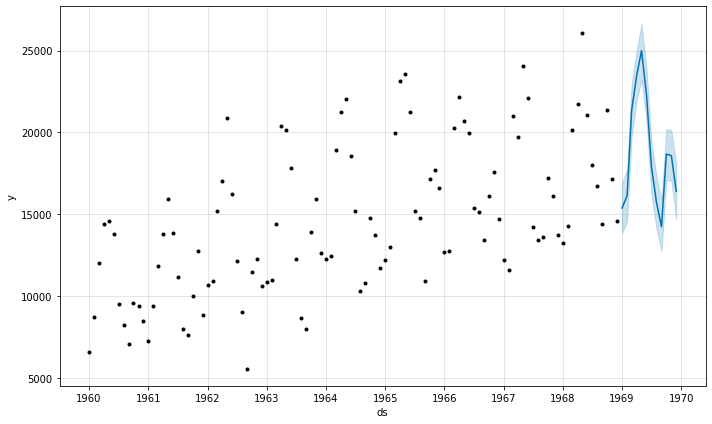

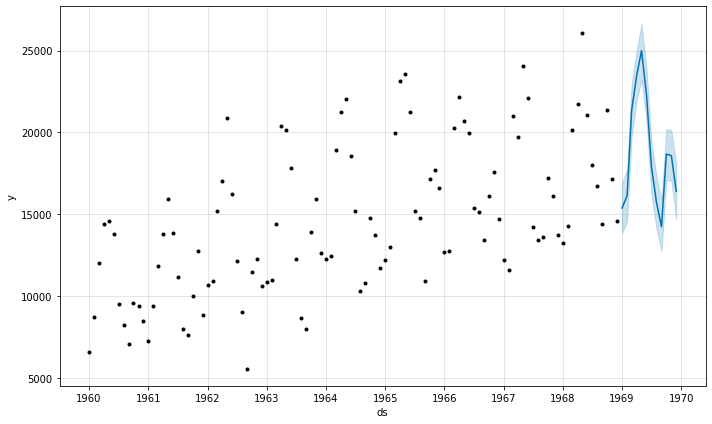

In [18]:
model.plot(forecast)

In [19]:
import joblib
joblib.dump(model,"sales.sav")

['sales.sav']

In [20]:
pwd

'E:\\Geethanjali externship'